In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('results.txt', header=0)
data.head()

,id,train_size,test_size,epoch_convergence,train_acc,test_acc,dev_size,tree_dataset_size,sim_threshold,all_merges,correct_merges,equivalent,dev_acc
0,0,8000,2000,2,100.0,100.000000,10000,100,0.95,349,349,1,100.0
1,1,8000,2000,3,100.0,100.000000,10000,100,0.95,323,323,1,100.0
2,0,8000,2000,2,100.0,100.000000,10000,100,0.95,349,349,1,100.0
3,1,8000,2000,3,100.0,100.000000,10000,100,0.95,399,399,1,100.0
4,2,8000,2000,25,100.0,99.989998,10000,100,0.95,319,318,1,100.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 48 non-null     int64  
 1   train_size         48 non-null     int64  
 2   test_size          48 non-null     int64  
 3   epoch_convergence  48 non-null     int64  
 4   train_acc          48 non-null     float64
 5   test_acc           48 non-null     float64
 6   dev_size           48 non-null     int64  
 7   tree_dataset_size  48 non-null     int64  
 8   sim_threshold      48 non-null     float64
 9   all_merges         48 non-null     int64  
 10  correct_merges     48 non-null     int64  
 11  equivalent         48 non-null     int64  
 12  dev_acc            48 non-null     float64
dtypes: float64(4), int64(9)
memory usage: 5.0 KB


In [30]:
df = data.drop(columns=['train_size','test_size','dev_size'])
df = df.sort_values('id')
df.head()

,id,epoch_convergence,train_acc,test_acc,tree_dataset_size,sim_threshold,all_merges,correct_merges,equivalent,dev_acc
0,0,2,100.0,100.0,100,0.95,349,349,1,100.0
29,0,2,100.0,100.0,100,0.95,419,419,1,100.0
11,0,2,100.0,100.0,100,0.95,320,320,0,100.0
38,0,2,100.0,100.0,100,0.95,400,400,0,100.0
20,0,2,100.0,100.0,100,0.95,394,394,1,100.0


### Comparison between the total merges done and the correct merges

[Text(0, 0, '0'),
 Text(1, 0, '0'),
 Text(2, 0, '0'),
 Text(3, 0, '0'),
 Text(4, 0, '0'),
 Text(5, 0, '0'),
 Text(6, 0, '1'),
 Text(7, 0, '1'),
 Text(8, 0, '1'),
 Text(9, 0, '1'),
 Text(10, 0, '1'),
 Text(11, 0, '1'),
 Text(12, 0, '2'),
 Text(13, 0, '2'),
 Text(14, 0, '2'),
 Text(15, 0, '2'),
 Text(16, 0, '2'),
 Text(17, 0, '3'),
 Text(18, 0, '3'),
 Text(19, 0, '3'),
 Text(20, 0, '3'),
 Text(21, 0, '3'),
 Text(22, 0, '4'),
 Text(23, 0, '4'),
 Text(24, 0, '4'),
 Text(25, 0, '4'),
 Text(26, 0, '4'),
 Text(27, 0, '5'),
 Text(28, 0, '5'),
 Text(29, 0, '5'),
 Text(30, 0, '5'),
 Text(31, 0, '5'),
 Text(32, 0, '6'),
 Text(33, 0, '6'),
 Text(34, 0, '6'),
 Text(35, 0, '6'),
 Text(36, 0, '6'),
 Text(37, 0, '7'),
 Text(38, 0, '7'),
 Text(39, 0, '7'),
 Text(40, 0, '7'),
 Text(41, 0, '7'),
 Text(42, 0, '8'),
 Text(43, 0, '8'),
 Text(44, 0, '8'),
 Text(45, 0, '8'),
 Text(46, 0, '8'),
 Text(47, 0, '9')]

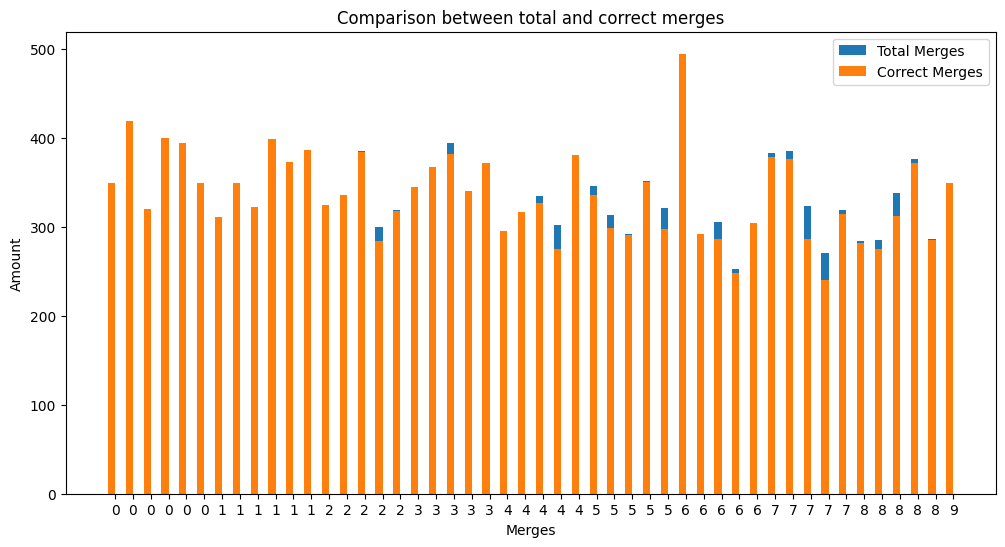

In [32]:
x = np.arange(len(df.all_merges))
width=0.4
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(x-width/2, df.sort_values(by=['id']).all_merges, width, label='Total Merges')
ax.bar(x-width/2, df.sort_values(by=['id']).correct_merges, width, label='Correct Merges')
ax.set_xticks(x)
ax.set_xlabel('Merges')
ax.set_ylabel('Amount')
ax.set_title("Comparison between total and correct merges")
ax.legend()
ax.set_xticklabels(df.sort_values(by=['id']).id)


In [ ]:
data2 = df[''].groupby('id')

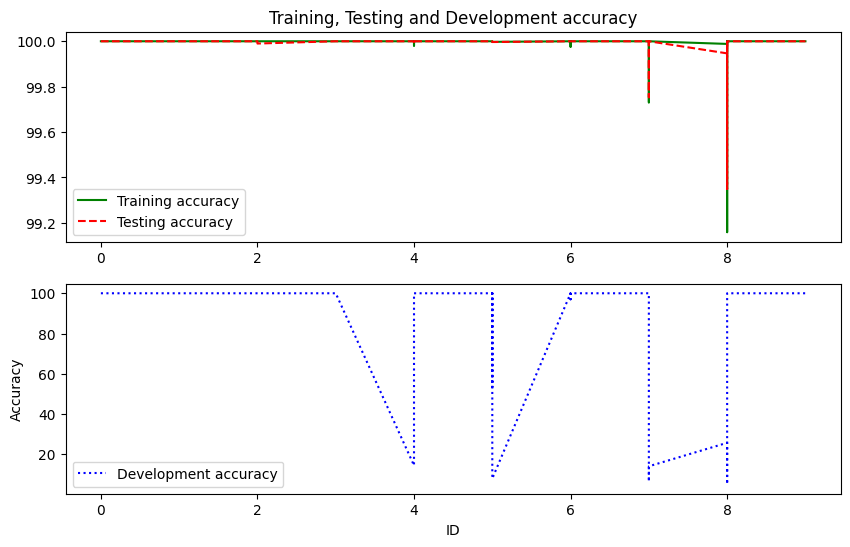

In [46]:
fig, ax= plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ax[0].plot(df.id, df.train_acc, color='g', ls='-', label='Training accuracy')
ax[0].plot(df.id, df.test_acc, color='r', ls='--', label='Testing accuracy')
ax[1].plot(df.id, df.dev_acc, color='b', ls='dotted', label='Development accuracy')
ax[0].set_title('Training, Testing and Development accuracy')
ax[1].set_xlabel('ID')
ax[1].set_ylabel('Accuracy')
ax[0].legend()
ax[1].legend()

In [56]:
equiv = df.groupby(by='equivalent').size()
equiv[0]

14

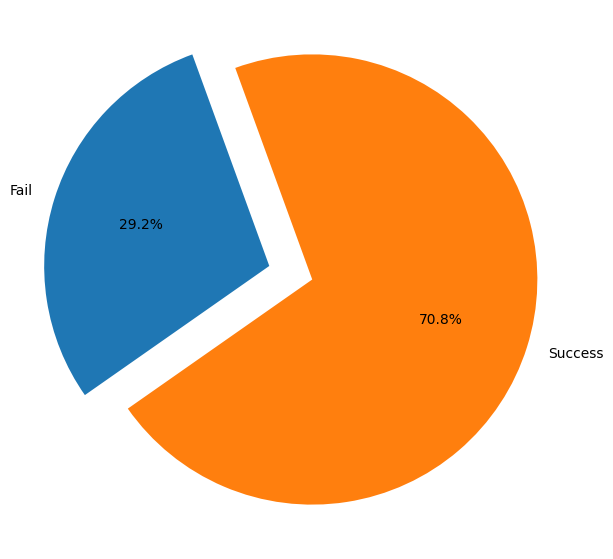

In [57]:
labels = ['Fail','Success']
sizes = equiv
explode = (0,0.2)
fig, ax=plt.subplots(figsize=(7,7))
ax.pie(sizes, explode=explode, labels=labels, shadow=False, startangle=110)
ax.axis('equal')
plt.show()

In [6]:
static_data = pd.read_csv('static_results_extract.txt', header=0)
static_data.head()

,id,threshold,expected_state_set_size,obtained_state_set_size,equivalent,init_dev_acc,final_dev_acc
0,0,0.9,2,3,1,1.68,100.0
1,0,0.9,2,2,1,1.81,100.0
2,1,0.9,3,7,1,2.16,100.0
3,1,0.9,3,8,1,1.97,100.0
4,2,0.9,4,9,1,2.22,100.0


In [ ]:
static_data

[Text(0, 0, '0'),
 Text(1, 0, '0'),
 Text(2, 0, '1'),
 Text(3, 0, '1'),
 Text(4, 0, '2'),
 Text(5, 0, '3'),
 Text(6, 0, '4'),
 Text(7, 0, '5'),
 Text(8, 0, '6'),
 Text(9, 0, '7'),
 Text(10, 0, '8'),
 Text(11, 0, '9')]

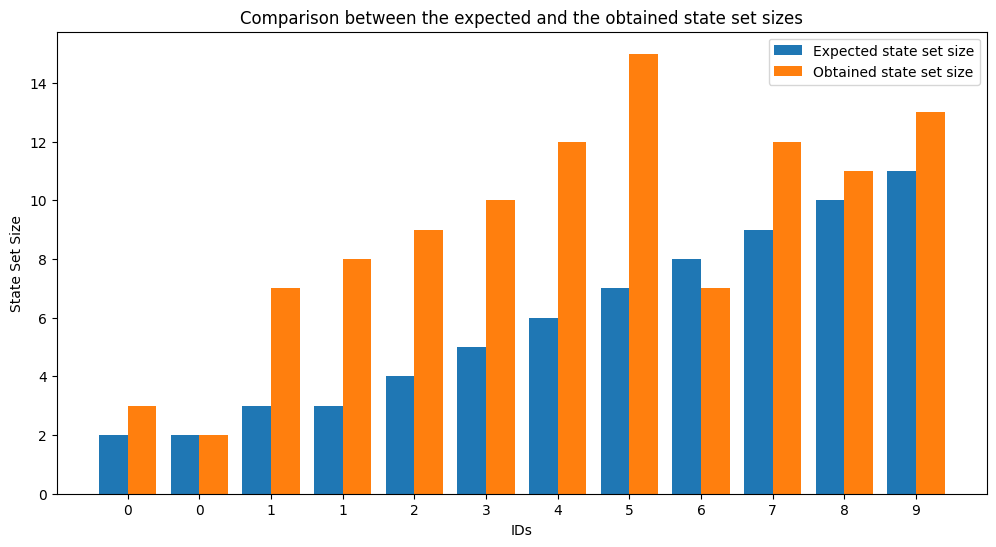

In [7]:
x = np.arange(len(static_data.id))
width=0.4
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(x-width/2, static_data.sort_values(by=['id']).expected_state_set_size, width, label='Expected state set size')
ax.bar(x+width/2, static_data.sort_values(by=['id']).obtained_state_set_size, width, label='Obtained state set size')
ax.set_xticks(x)
ax.set_xlabel('IDs')
ax.set_ylabel('State Set Size')
ax.set_title("Comparison between the expected and the obtained state set sizes")
ax.legend()
ax.set_xticklabels(static_data.sort_values(by=['id']).id)


[Text(0, 0, '0'),
 Text(1, 0, '0'),
 Text(2, 0, '1'),
 Text(3, 0, '1'),
 Text(4, 0, '2'),
 Text(5, 0, '3'),
 Text(6, 0, '4'),
 Text(7, 0, '5'),
 Text(8, 0, '6'),
 Text(9, 0, '7'),
 Text(10, 0, '8'),
 Text(11, 0, '9')]

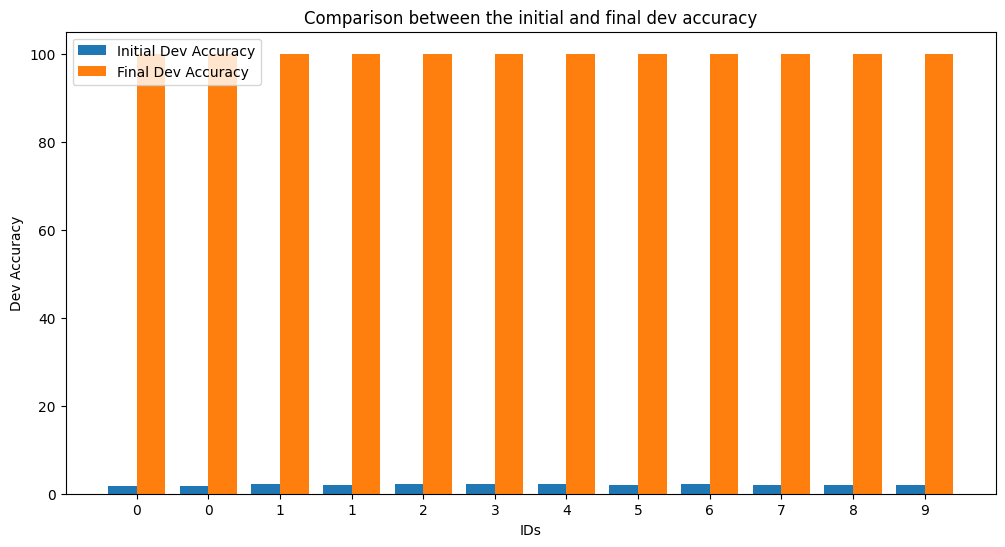

In [8]:
x = np.arange(len(static_data.id))
width=0.4
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(x-width/2, static_data.sort_values(by=['id']).init_dev_acc, width, label='Initial Dev Accuracy')
ax.bar(x+width/2, static_data.sort_values(by=['id']).final_dev_acc, width, label='Final Dev Accuracy')
ax.set_xticks(x)
ax.set_xlabel('IDs')
ax.set_ylabel('Dev Accuracy')
ax.set_title("Comparison between the initial and final dev accuracy")
ax.legend()
ax.set_xticklabels(static_data.sort_values(by=['id']).id)
